In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import missingno

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
config = {
    'data_path': '/content/drive/MyDrive/lg_aimers/data'
    ,'result_path': '/content/drive/MyDrive/lg_aimers/result'

}

In [5]:
df_train = pd.read_csv(f'{config["data_path"]}/train.csv')
print(df_train.shape)
df_train

(59299, 29)


,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.00,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.00,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.00,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.00,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.00,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,/Sląskie/Poland,AS,NaN,33747,End Customer,SMB,NaN,NaN,NaN,...,LGEPL,3 months ~ 6 months,0,0,0.000026,0.028777,public facility,Others,694,False
59295,0.75,/Bogotá DC /Colombia,AS,0.040000,35420,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGECB,9 months ~ 1 year,0,0,0.000026,0.028777,public facility,NaN,39,False
59296,0.75,/Pisco/Peru,AS,0.040000,19249,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEPR,less than 3 months,0,0,0.000026,0.028777,public facility,NaN,125,False
59297,1.00,/santa cruz bolivia/Peru,AS,0.040000,40327,NaN,Enterprise,NaN,NaN,NaN,...,LGEPR,more than a year,0,0,0.000026,0.028777,public facility,NaN,134,False


In [6]:
def print_and_plot_value_ratios(df, column_name):
    # Calculate the ratio of values in the specified column
    value_ratios = df[column_name].value_counts(normalize=True) * 100  # Convert ratios to percentages

    # Print the ratios
    print(f"Ratios of values in {column_name}:")
    print(value_ratios)

    # Plot the ratios
    ax = value_ratios.plot(kind='bar')
    plt.title(f"Ratios of values in {column_name}")
    plt.xlabel('Value')
    plt.ylabel('Ratio (%)')

    # Annotate the bars with the ratio percentages
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()  # Adjust layout to make room for the annotations
    plt.show()

Ratios of values in is_converted:
False    91.82111
True      8.17889
Name: is_converted, dtype: float64


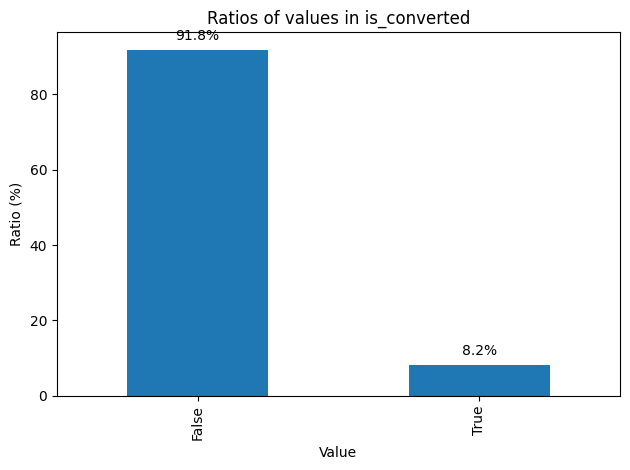

In [7]:
print_and_plot_value_ratios(df_train, 'is_converted')

In [8]:
def show_missing_rates(df_input, selected_columns=None):
    # Calculate the total number of rows in the DataFrame
    total_rows = len(df_input)

    if selected_columns is None:
        selected_columns = df_input.columns

    # Find the longest column name for formatting
    # Determine the longest string needed for formatting the column name and its data type
    longest_str = max(len(f"{column}" ) for column in selected_columns)
    #longest_column_name = max(len(column) for column in selected_columns)

    # Iterate over each column in the DataFrame
    for column in selected_columns:
        # Count the number of missing values in the column
        missing_count = df_input[column].isna().sum()

        # Calculate the percentage of missing values
        missing_rate = (missing_count / total_rows) * 100

        # Get the data type of the column
        data_type = df_input[column].dtype

        # Print the column name, its data type, and its missing rate with aligned formatting
        print(f"{column}".ljust(longest_str) + f": {missing_rate:5.2f}% missing values ({data_type})" )


In [9]:
show_missing_rates(df_train)

bant_submit            :  0.00% missing values (float64)
customer_country       :  1.66% missing values (object)
business_unit          :  0.00% missing values (object)
com_reg_ver_win_rate   : 75.43% missing values (float64)
customer_idx           :  0.00% missing values (int64)
customer_type          : 74.13% missing values (object)
enterprise             :  0.00% missing values (object)
historical_existing_cnt: 76.80% missing values (float64)
id_strategic_ver       : 94.19% missing values (float64)
it_strategic_ver       : 98.11% missing values (float64)
idit_strategic_ver     : 92.30% missing values (float64)
customer_job           : 31.59% missing values (object)
lead_desc_length       :  0.00% missing values (int64)
inquiry_type           :  1.59% missing values (object)
product_category       : 32.67% missing values (object)
product_subcategory    : 84.43% missing values (object)
product_modelname      : 84.44% missing values (object)
customer_country.1     :  1.66% missing valu

In [10]:
def plot_cat_columns(df_input, categorical_vars, target):
    for column in categorical_vars:
        if column == target:
            continue

        fig, axes = plt.subplots(1, 2, figsize=(18, 5.5))
        df_input[column].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
        axes[0].set_ylabel(f'{column}')
        sns.countplot(x=column,data=df_input,ax=axes[1], hue=target)
        plt.suptitle(f'{column}')
        plt.show()

In [11]:
def plot_cat_columns_v2(df_input, categorical_vars, target):
    for column in categorical_vars:
        if column == target:
            continue

        # Determine the number of unique values
        unique_values = df_input[column].nunique()

        # Adjust subplot arrangement based on the number of unique values
        if unique_values > 15:
            fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # Top-bottom layout for more than 15 unique values
            rotation_angle = 90
        else:
            fig, axes = plt.subplots(1, 2, figsize=(18, 5.5))  # Side-by-side layout for 15 or fewer unique values
            rotation_angle = 45

        # Plot the pie chart
        df_input[column].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0] if unique_values <= 15 else axes[0], shadow=True)
        axes[0].set_ylabel('')  # Clear the y-axis label for the pie chart for neatness

        # Plot the count plot
        ax_countplot = sns.countplot(x=column, data=df_input, ax=axes[1] if unique_values <= 15 else axes[1], hue=target)

        # Rotate x-axis labels without triggering the warning
        for label in ax_countplot.get_xticklabels():
            label.set_rotation(rotation_angle)
            label.set_ha("right")

        axes[1].set_ylabel('Count')  # Add y-axis label for clarity
        axes[1].set_title(f'Distribution of {column} by {target}')  # Set title for each subplot for clarity

        plt.suptitle(f'{column} Analysis', fontsize=16)  # Adjust the main title
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the suptitle and x-axis labels
        plt.show()

In [12]:
def plot_cat_columns_v3(df_input, categorical_vars, target):
    for column in categorical_vars:
        if column == target:
            continue

        # Determine the number of unique values
        unique_values = df_input[column].nunique()

        # Adjust subplot arrangement based on the number of unique values
        if unique_values > 15:
            fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # Top-bottom layout for more than 15 unique values
            rotation_angle = 90
        else:
            fig, axes = plt.subplots(1, 2, figsize=(18, 5.5))  # Side-by-side layout for 15 or fewer unique values
            rotation_angle = 45

        # Sort the categories
        sorted_categories = df_input[column].value_counts().sort_index().index

        # Plot the pie chart
        df_input[column].value_counts().loc[sorted_categories].plot.pie(autopct='%1.1f%%', ax=axes[0] if unique_values <= 15 else axes[0], shadow=True)
        axes[0].set_ylabel('')  # Clear the y-axis label for the pie chart for neatness

        # Plot the count plot
        # Note: We ensure that the data is sorted according to the sorted categories for the count plot
        sorted_df = df_input.sort_values(by=column)
        ax_countplot = sns.countplot(x=column, data=sorted_df, ax=axes[1] if unique_values <= 15 else axes[1], hue=target, order=sorted_categories)

        # Rotate x-axis labels without triggering the warning
        for label in ax_countplot.get_xticklabels():
            label.set_rotation(rotation_angle)
            label.set_ha("right")

        axes[1].set_ylabel('Count')  # Add y-axis label for clarity
        axes[1].set_title(f'Distribution of {column} by {target}')  # Set title for each subplot for clarity

        plt.suptitle(f'{column} Analysis', fontsize=16)  # Adjust the main title
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the suptitle and x-axis labels
        plt.show()

In [13]:
def plot_numeric_columns(df_input, continuous_vars, target):
    for column in continuous_vars:
        fig, ax = plt.subplots(figsize=(18, 4))
        fig = sns.histplot(data=df_input, x=column, hue=target, bins=50, kde=True)
        plt.show()

# Column List
- `business_unit`
- `id_strategic_ver`     
- `it_strategic_ver`
- `idit_strategic_ver`
- `business_area`
- `business_subarea`

In [14]:
show_missing_rates(df_train, selected_columns=[
    'business_unit', 'id_strategic_ver', 'it_strategic_ver',
    'idit_strategic_ver', 'business_area', 'business_subarea'
])

business_unit     :  0.00% missing values (object)
id_strategic_ver  : 94.19% missing values (float64)
it_strategic_ver  : 98.11% missing values (float64)
idit_strategic_ver: 92.30% missing values (float64)
business_area     : 68.94% missing values (object)
business_subarea  : 90.68% missing values (object)


- Categorical Columns: `business_unit`, `business_area`, `business_subarea`
- Numerical Columns: `id_strategic_ver`, `it_strategic_ver`, `idit_strategic_ver`

In [15]:
def plot_missing(df_input):
    sns.displot(data=df_input.isnull().melt(value_name='missing'),
        y='variable',
        hue='missing',
        multiple='fill',
        height=8,
    #     width=10,
        aspect=1.6
    )

    # specifying a threshold value
    plt.axvline(0.4, color='r')
    plt.title('Null Values in Train Data', fontsize=13)
    plt.show()

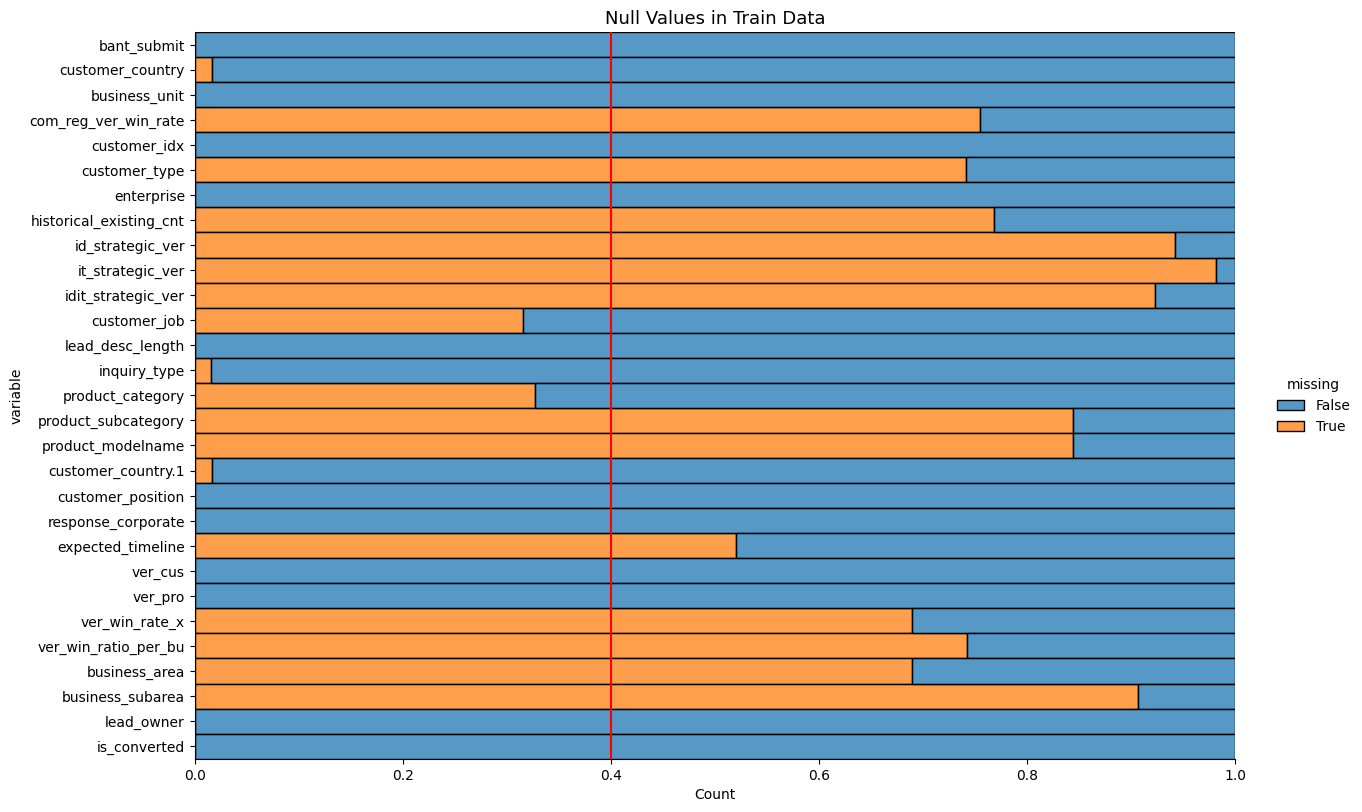

In [16]:
plot_missing(df_train)

<Axes: >

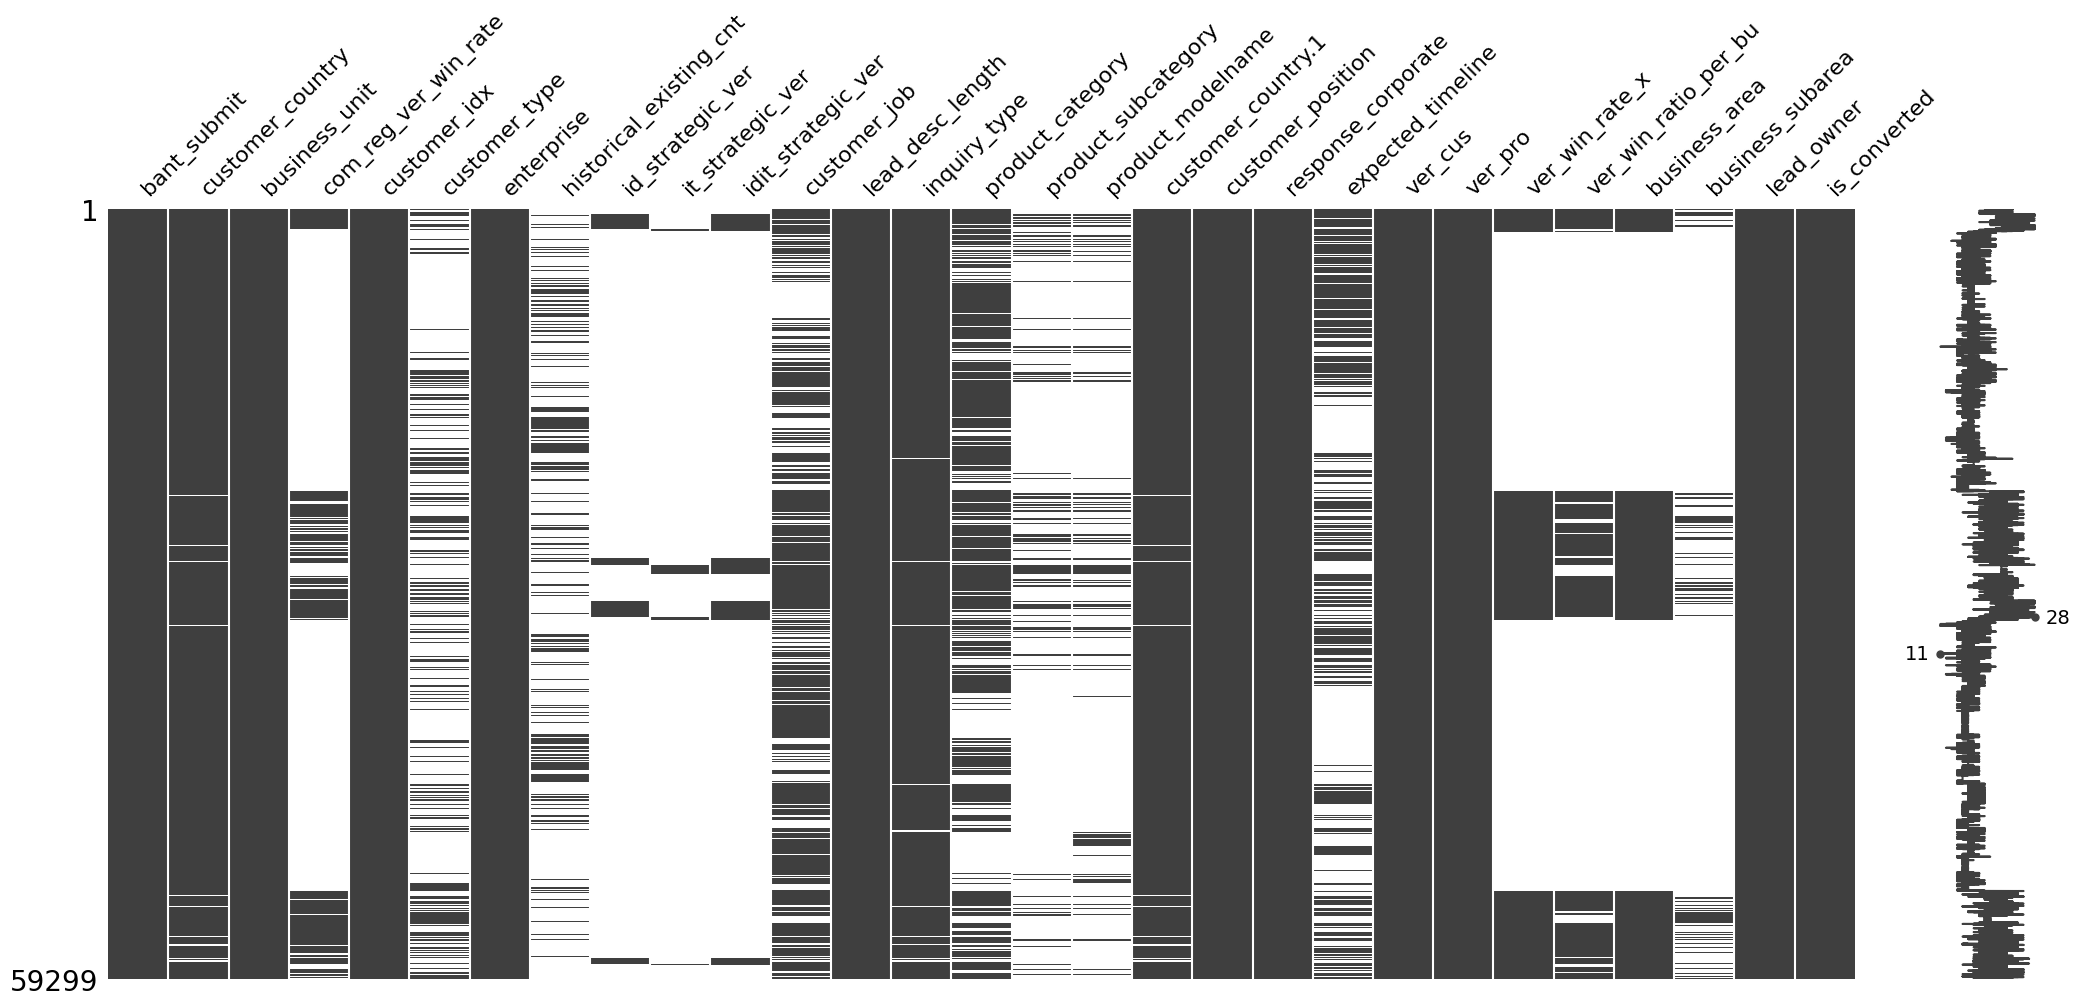

In [17]:
missingno.matrix(df_train)

# Missing Values
1. `id_strategic_var`와 `it_strategic_var`는 disjoint인가?
2. `business_area`로 `business_subarea`를 채울 수 있는가?

<Axes: >

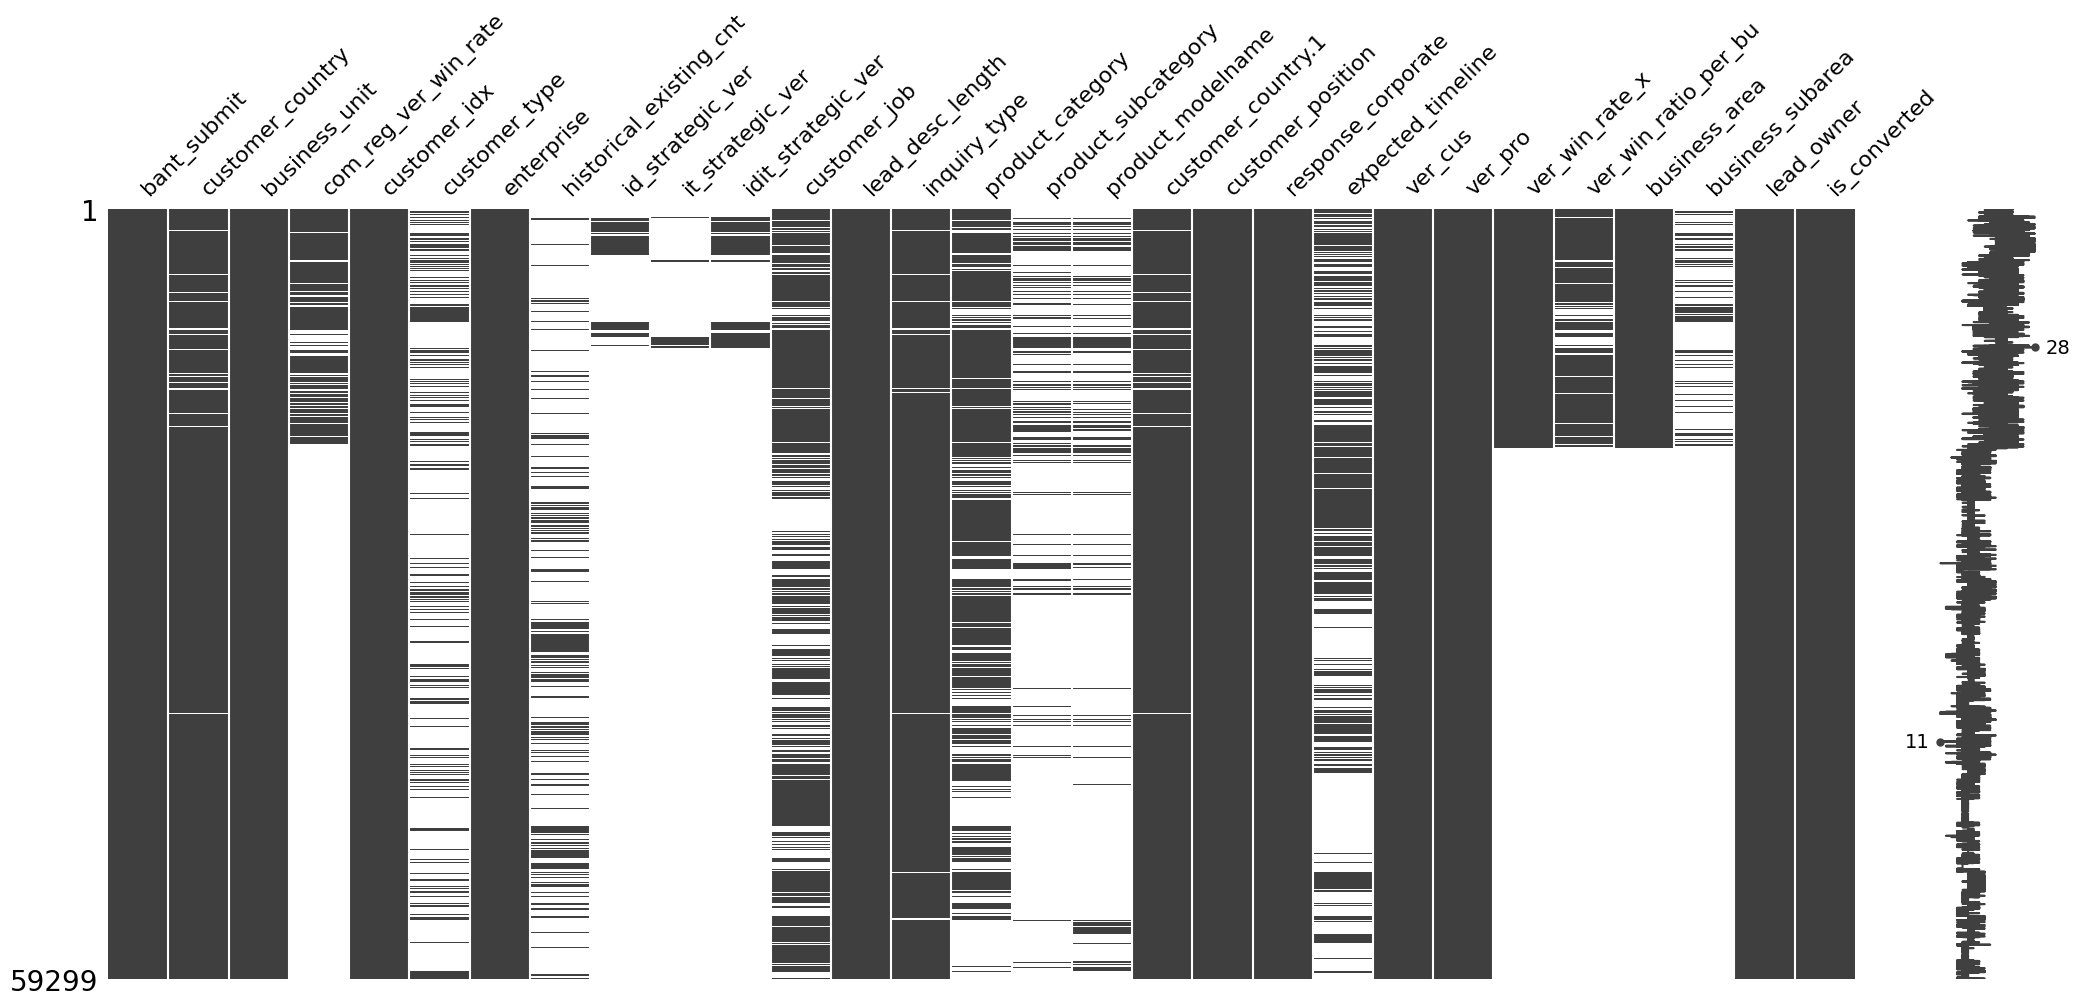

In [18]:
sorted_bus_area = df_train.sort_values('business_area')
missingno.matrix(sorted_bus_area)

- `business_area`로 정렬한 후 결측치 분포 확인
- `com_reg_ver_win_rate`, `ver_win_rate_x`, `ver_win_ratio_per_bu`, `business_area`, `business_subarea` 이렇게 5개 컬럼의 결측치 분포가 비슷하다.
- `id_*`, `it_*`, `idit_*`는 이 셋 끼리의 분포만 같고 다른 컬럼과 연관성이 보이지 않아 보임.

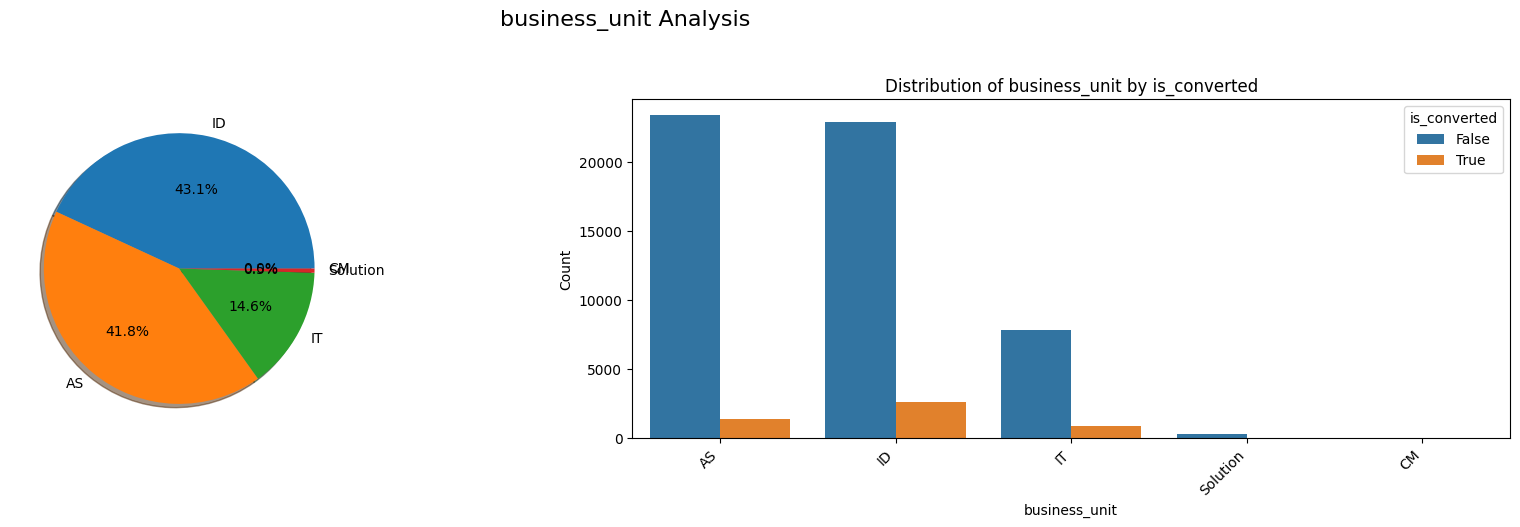

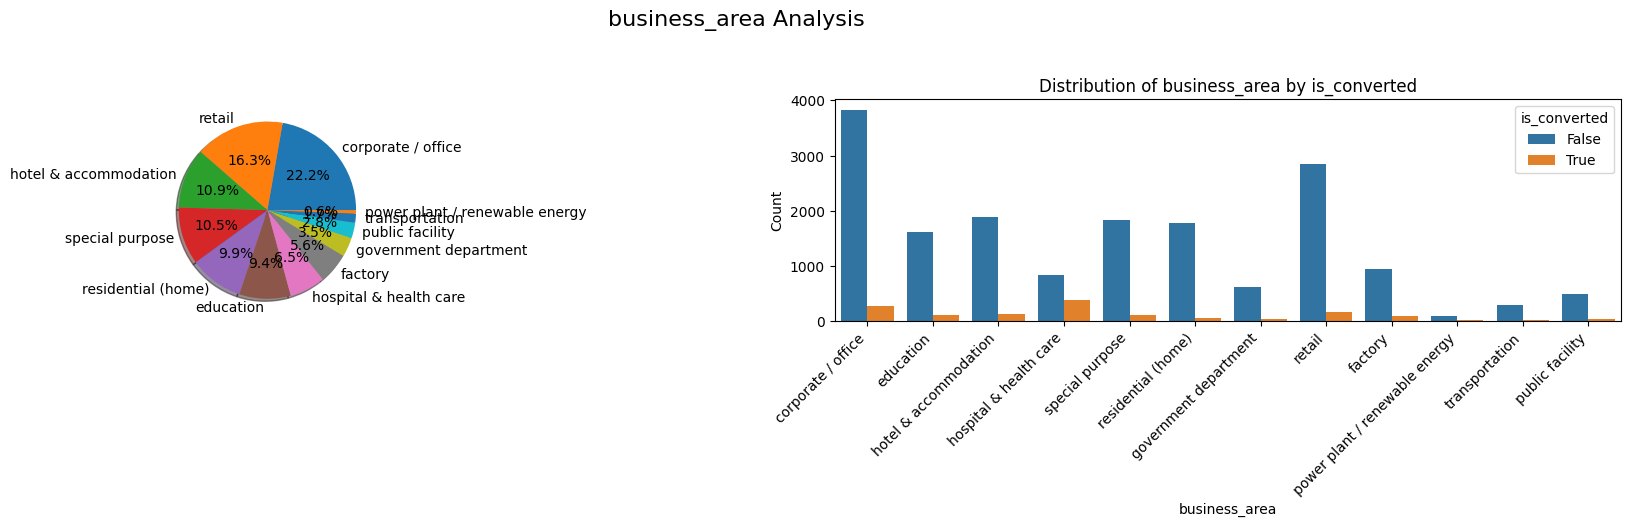

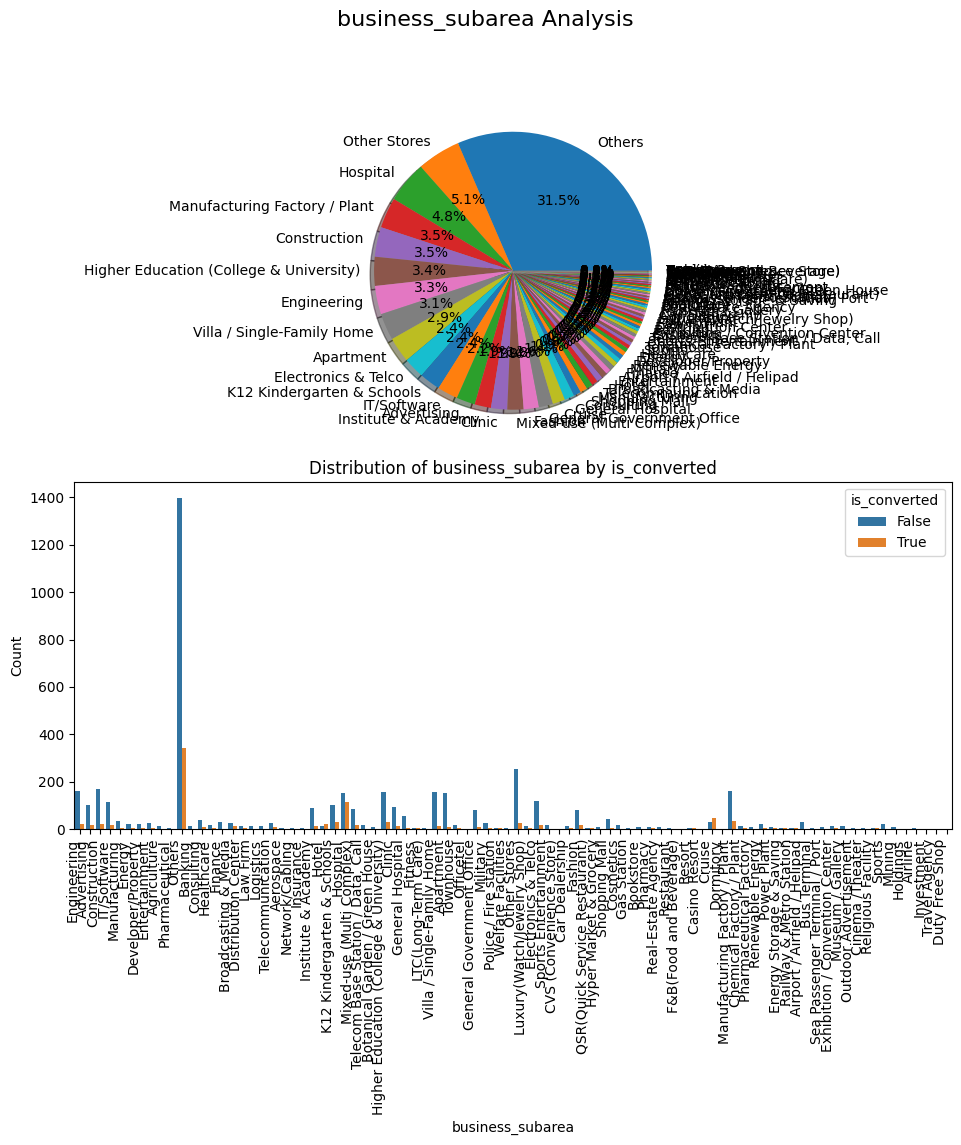

In [19]:
plot_cat_columns_v2(df_train, ['business_unit', 'business_area', 'business_subarea'], target='is_converted')

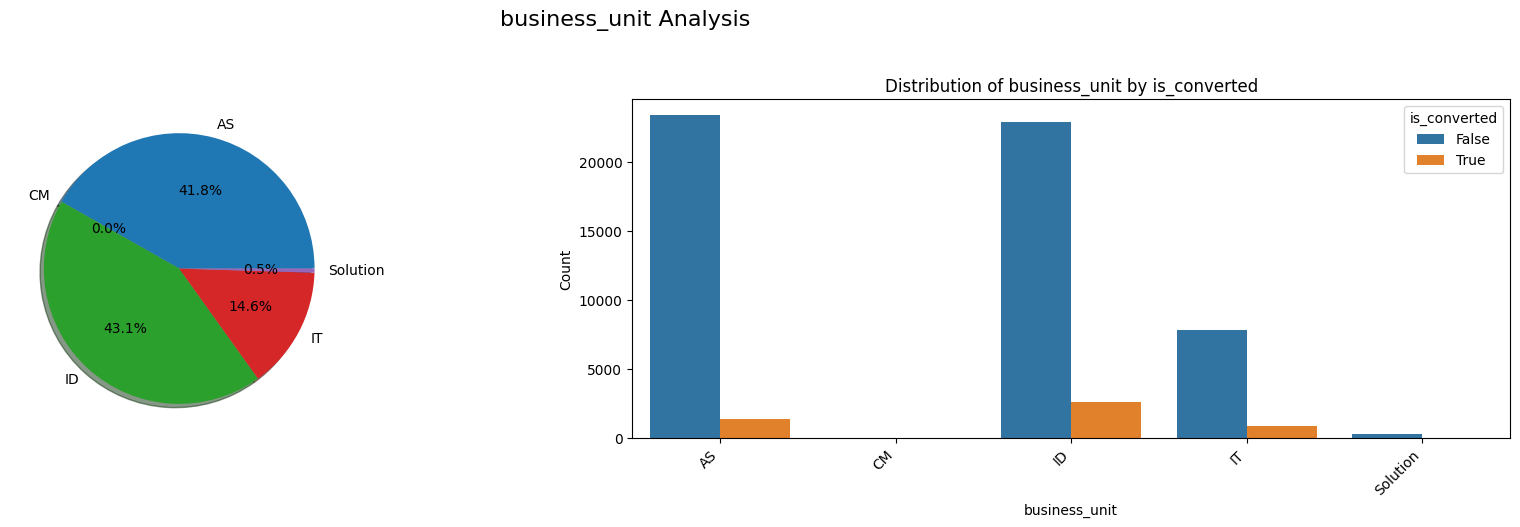

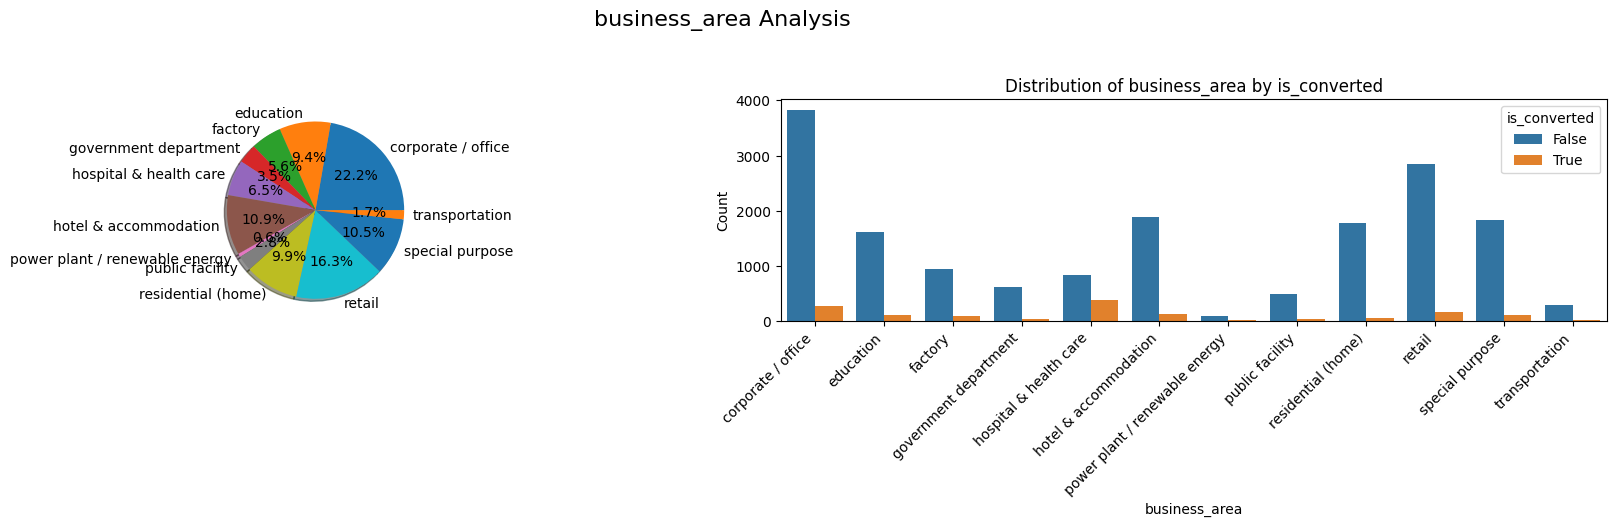

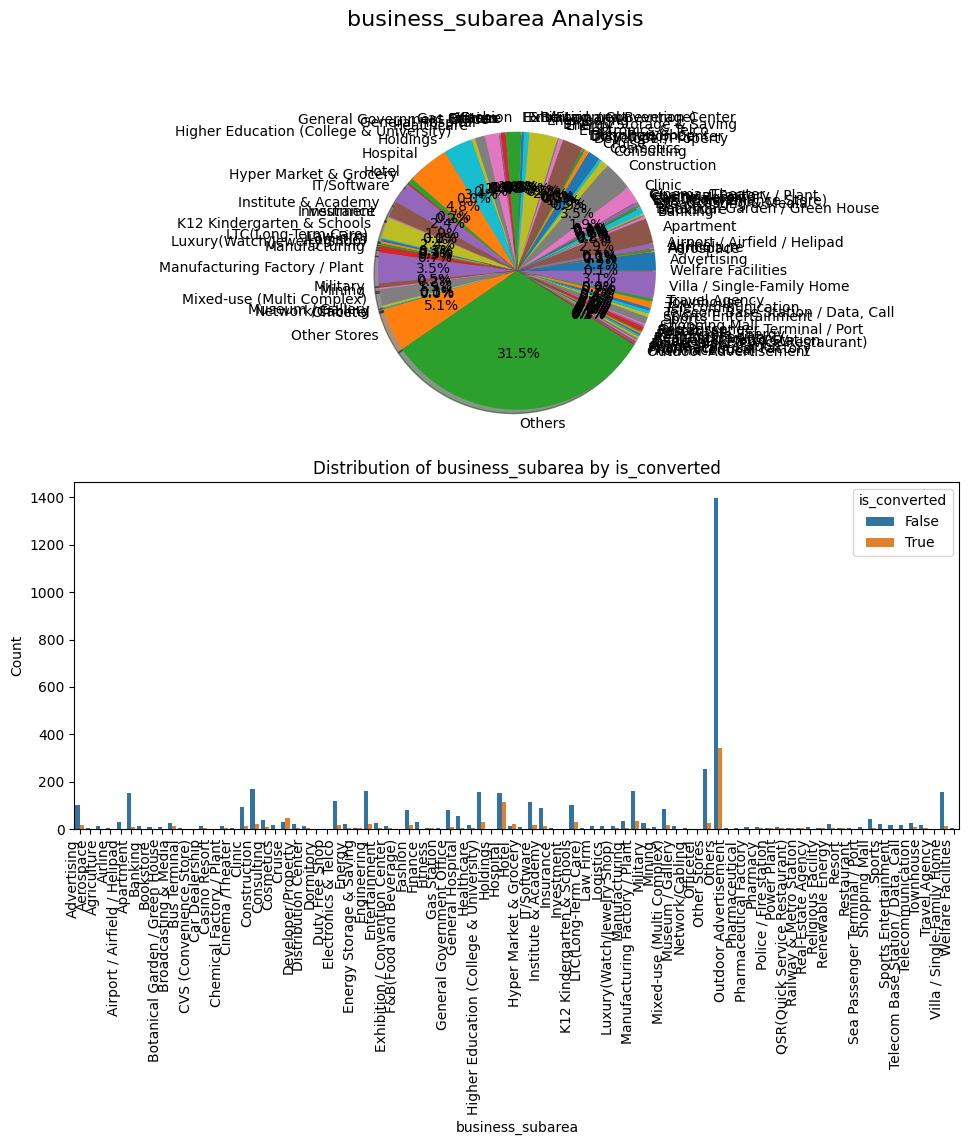

In [20]:
plot_cat_columns_v3(df_train, ['business_unit', 'business_area', 'business_subarea'], target='is_converted')

In [21]:
df_train['business_subarea'].nunique()

86

In [22]:
def show_ratio(df_input, selected_columns: list, target: str):
    for column in selected_columns:
        # Print the column name and its total count
        print(f'{column}: {df_input[column].notnull().sum()}')

        # Calculate the counts of the target column's values grouped by the selected column
        counts = df_input.groupby(column)[target].value_counts()

        # Iterate over the MultiIndex Series to print each target value and its count
        for (column_value, target_value), count in counts.iteritems():
            # Using four spaces for indentation before each line as specified
            print(f'    {column_value} {target_value}: {count}')

        # Print a blank line for better readability between columns
        print()

In [23]:
def show_binary_ratio(df_input, selected_columns: list, target: str):
    longest_str = max(len(f"{column}" ) for column in selected_columns)

    for column in selected_columns:
        print(f'{column}: {df_input[column].notnull().sum()}')

        # Get unique values in the column
        unique_values = sorted(df_input[column].dropna().unique())

        longest_str = max(len(f"    {value}" ) for value in unique_values)
        for value in unique_values:
            # For each unique value, count occurrences of target 0 and 1
            count_0 = df_input[(df_input[column] == value) & (df_input[target] == False)].shape[0]
            count_1 = df_input[(df_input[column] == value) & (df_input[target] == True)].shape[0]
            count_01 = count_0 + count_1

            # Print counts for target 0 and 1 with indentation
            #print(f"{column}".ljust(longest_str)
            print(f'    {value}'.ljust(longest_str), end=' ')
            print(f'True Ratio: {count_1 / count_01:.2f}, Total Count: {count_01}')

        # Print a blank line for better readability between columns
        print()

In [24]:
show_binary_ratio(df_train, ['business_unit', 'business_area', 'business_subarea'], target='is_converted')

business_unit: 59299
    AS       True Ratio: 0.06, Total Count: 24774
    CM       True Ratio: 0.00, Total Count: 2
    ID       True Ratio: 0.10, Total Count: 25563
    IT       True Ratio: 0.10, Total Count: 8664
    Solution True Ratio: 0.01, Total Count: 296

business_area: 18417
    corporate / office             True Ratio: 0.07, Total Count: 4097
    education                      True Ratio: 0.06, Total Count: 1727
    factory                        True Ratio: 0.09, Total Count: 1035
    government department          True Ratio: 0.06, Total Count: 650
    hospital & health care         True Ratio: 0.31, Total Count: 1199
    hotel & accommodation          True Ratio: 0.06, Total Count: 2013
    power plant / renewable energy True Ratio: 0.18, Total Count: 113
    public facility                True Ratio: 0.07, Total Count: 519
    residential (home)             True Ratio: 0.02, Total Count: 1818
    retail                         True Ratio: 0.05, Total Count: 3011
    spe

# `business_unit`
- Dtype: object
- Missing Rate: 0%
- num_category: 5

In [25]:
print(df_train['business_area'].nunique())
print(df_train['business_subarea'].nunique())

12
86


In [26]:
df_areas = df_train[['business_area', 'business_subarea']]
print(df_areas)

            business_area business_subarea
0      corporate / office      Engineering
1      corporate / office      Advertising
2      corporate / office     Construction
3      corporate / office      IT/Software
4      corporate / office              NaN
...                   ...              ...
59294     public facility           Others
59295     public facility              NaN
59296     public facility              NaN
59297     public facility              NaN
59298     public facility              NaN

[59299 rows x 2 columns]


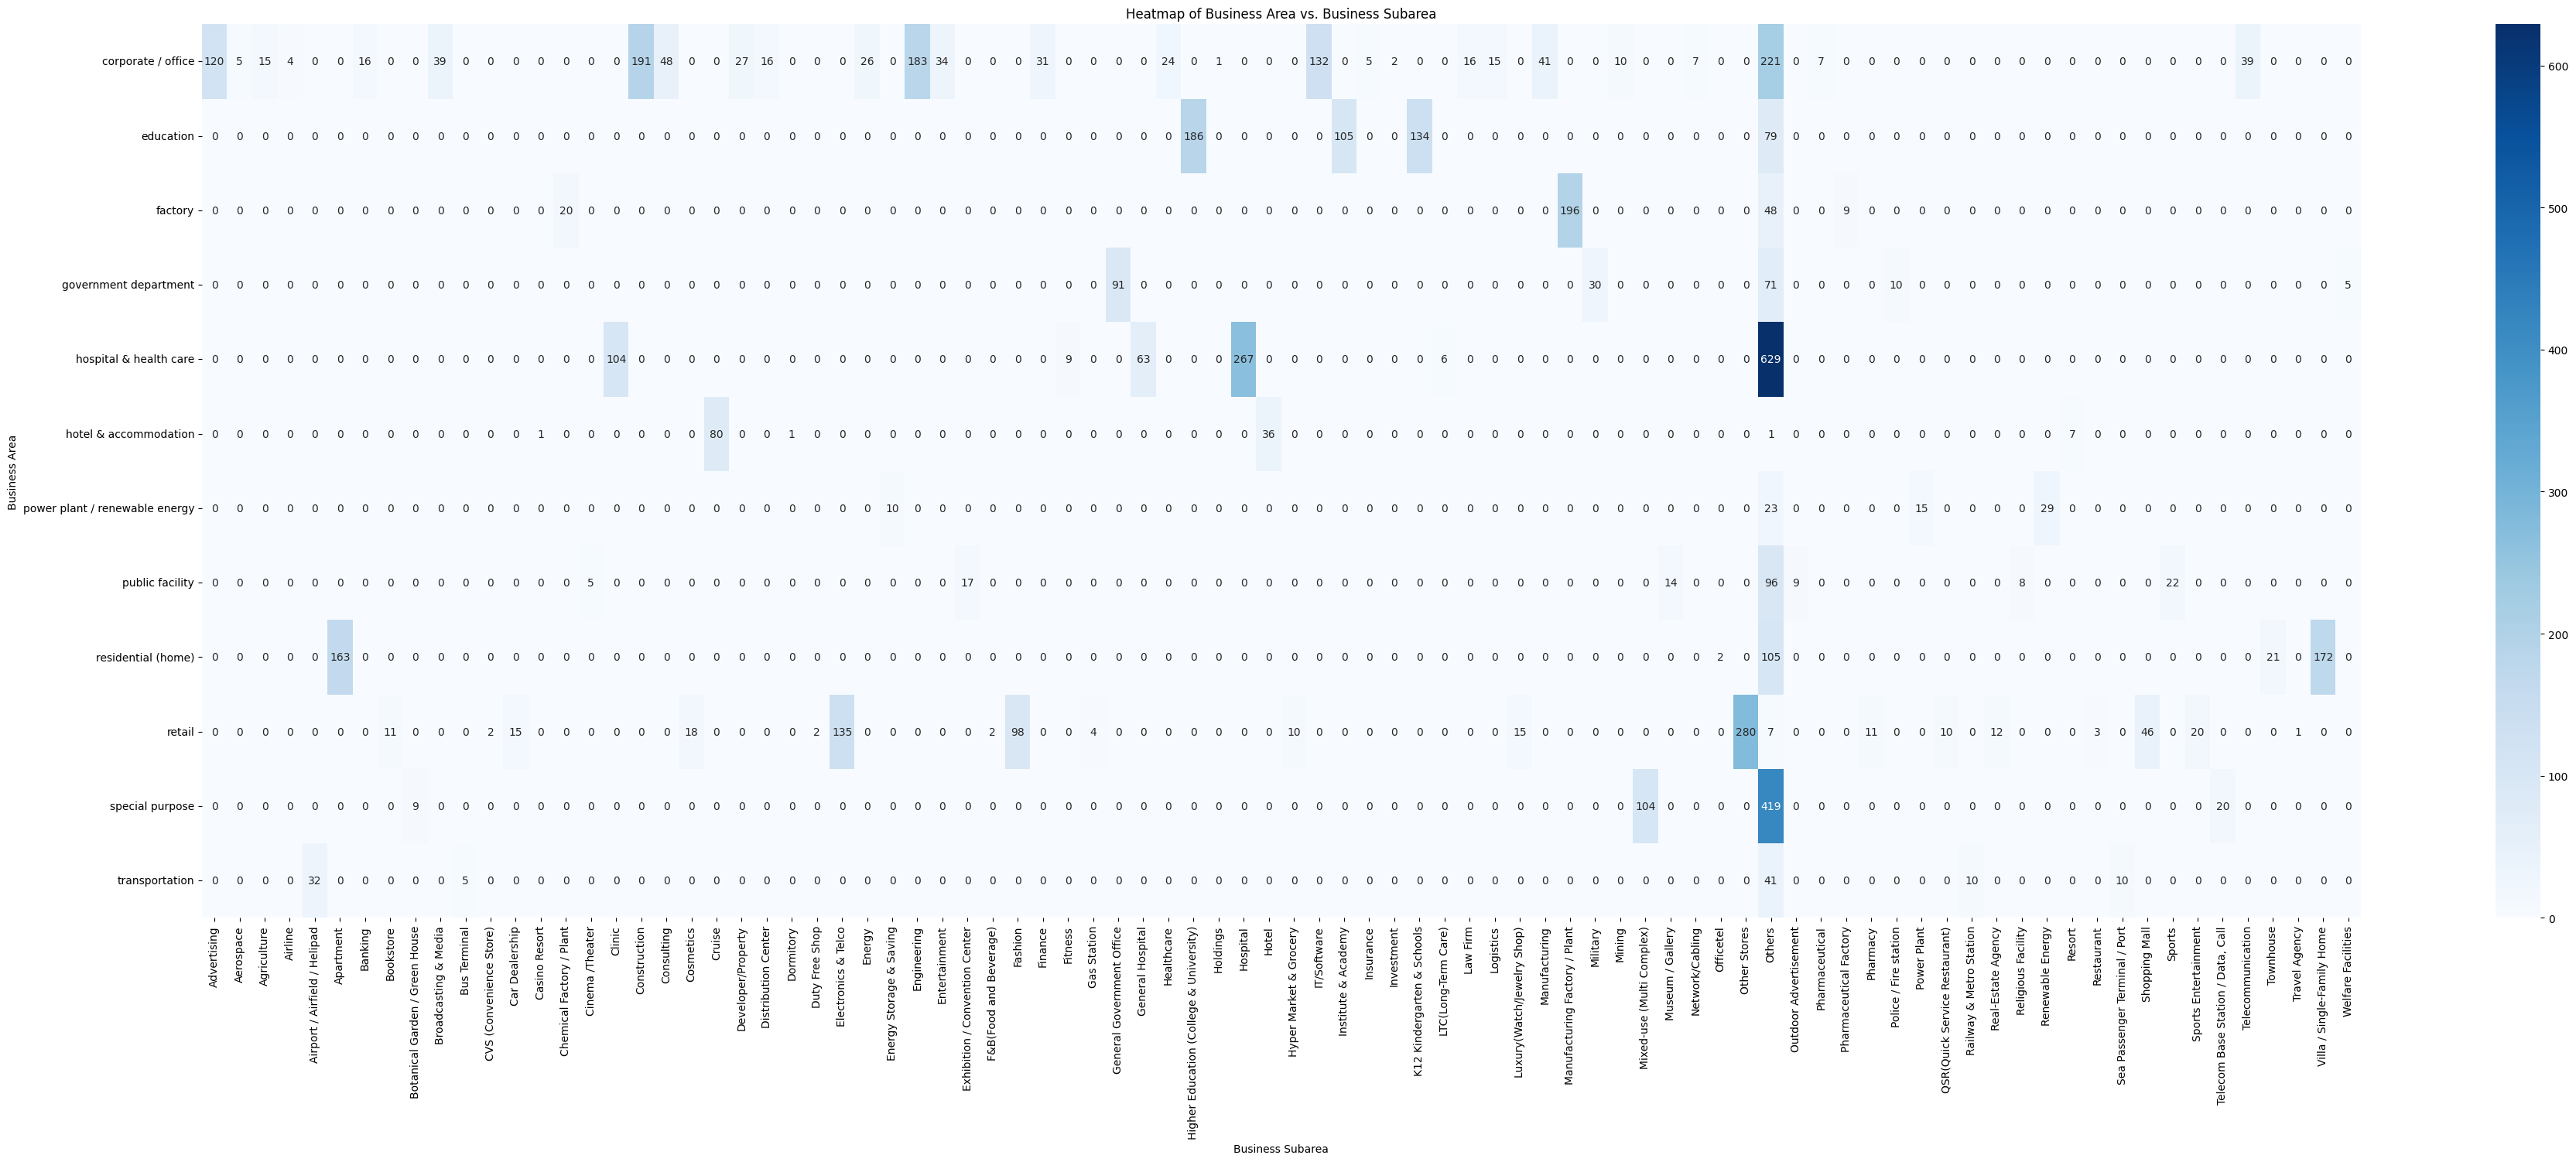

In [27]:
# Drop rows where any of the two columns is NaN
df_cleaned = df_areas.dropna(subset=['business_area', 'business_subarea'])

# Create a pivot table with counts of each combination
pivot_table = df_cleaned.pivot_table(index='business_area', columns='business_subarea', aggfunc=len, fill_value=0)

# Plot heatmap
plt.figure(figsize=(45, 15))
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt="d")
plt.title('Heatmap of Business Area vs. Business Subarea')
plt.ylabel('Business Area')
plt.xlabel('Business Subarea')
plt.xticks(rotation=90)
plt.show()

In [28]:
df_filtered = df_areas.dropna(subset=['business_subarea']).query("business_subarea != 'Others'")

# Count unique business_subarea for each business_area
unique_subarea_per_area = df_filtered.groupby('business_area')['business_subarea'].nunique()

# Count unique business_area for each business_subarea
unique_area_per_subarea = df_filtered.groupby('business_subarea')['business_area'].nunique()

# Determine the type of relationship
if unique_subarea_per_area.max() == 1 and unique_area_per_subarea.max() == 1:
    relationship = "One-to-One"
elif unique_subarea_per_area.max() > 1 and unique_area_per_subarea.max() == 1:
    relationship = "Many-to-One"
elif unique_subarea_per_area.max() == 1 and unique_area_per_subarea.max() > 1:
    relationship = "One-to-Many"
else:
    relationship = "Many-to-Many"

print(f"The relationship between 'business_area' and 'business_subarea' (excluding 'Others') is {relationship}.")

The relationship between 'business_area' and 'business_subarea' (excluding 'Others') is Many-to-One.


`business_area`와 `business_subarea`는 1-1 대응이 아님, 다대일 대응. (Others 제외)

In [29]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3786 entries, 0 to 59291
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   business_area     3786 non-null   object
 1   business_subarea  3786 non-null   object
dtypes: object(2)
memory usage: 88.7+ KB


In [30]:
pivot_table

business_subarea,Advertising,Aerospace,Agriculture,Airline,Airport / Airfield / Helipad,Apartment,Banking,Bookstore,Botanical Garden / Green House,Broadcasting & Media,...,Sea Passenger Terminal / Port,Shopping Mall,Sports,Sports Entertainment,"Telecom Base Station / Data, Call",Telecommunication,Townhouse,Travel Agency,Villa / Single-Family Home,Welfare Facilities
business_area,,,,,,,,,,,,,,,,,,,,,
corporate / office,120,5,15,4,0,0,16,0,0,39,...,0,0,0,0,0,39,0,0,0,0
education,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
factory,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
government department,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
hospital & health care,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hotel & accommodation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
power plant / renewable energy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
public facility,0,0,0,0,0,0,0,0,0,0,...,0,0,22,0,0,0,0,0,0,0
residential (home),0,0,0,0,0,163,0,0,0,0,...,0,0,0,0,0,0,21,0,172,0


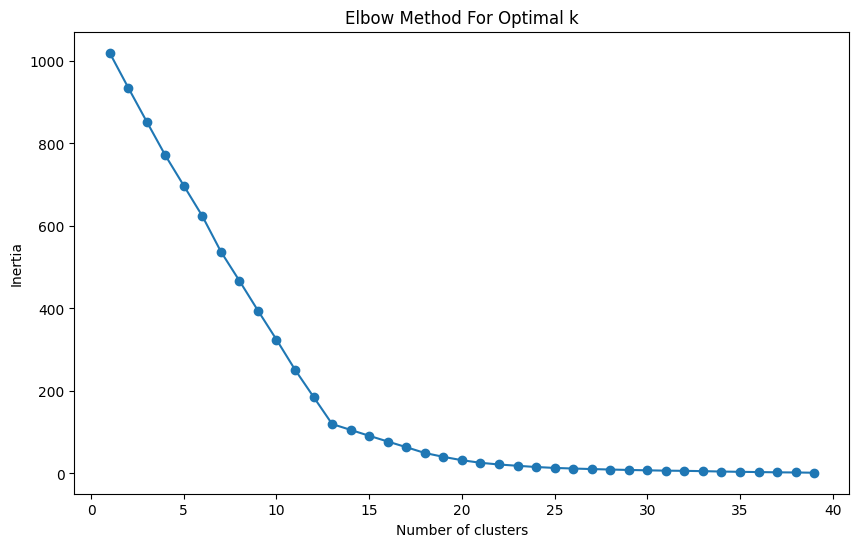

In [31]:
# Assuming df is your DataFrame and it's already filtered to exclude 'Others' and NaN in 'business_subarea'

# Step 1: Prepare the data
pivot_table = df_filtered.pivot_table(index='business_subarea', columns='business_area', aggfunc=len, fill_value=0)

# Step 2: Normalize the data
scaler = StandardScaler()
pivot_table_scaled = scaler.fit_transform(pivot_table)

# Step 3: Choose the number of clusters (example using the elbow method)
inertia = []
max_k = 40
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pivot_table_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

For n_clusters = 3, the average silhouette_score is : 0.5510091490719016
For n_clusters = 4, the average silhouette_score is : 0.5028384279369105
For n_clusters = 5, the average silhouette_score is : 0.46711312233763325
For n_clusters = 6, the average silhouette_score is : 0.41697324114491274
For n_clusters = 7, the average silhouette_score is : 0.4983928712341697
For n_clusters = 8, the average silhouette_score is : 0.4763583958278964
For n_clusters = 9, the average silhouette_score is : 0.5183689977171684
For n_clusters = 10, the average silhouette_score is : 0.5481711340927917
For n_clusters = 11, the average silhouette_score is : 0.567912476879778
For n_clusters = 12, the average silhouette_score is : 0.5816400585961796
For n_clusters = 13, the average silhouette_score is : 0.6088615583801136
For n_clusters = 14, the average silhouette_score is : 0.5764585929180841
For n_clusters = 15, the average silhouette_score is : 0.5836552936425266
For n_clusters = 16, the average silhouette_

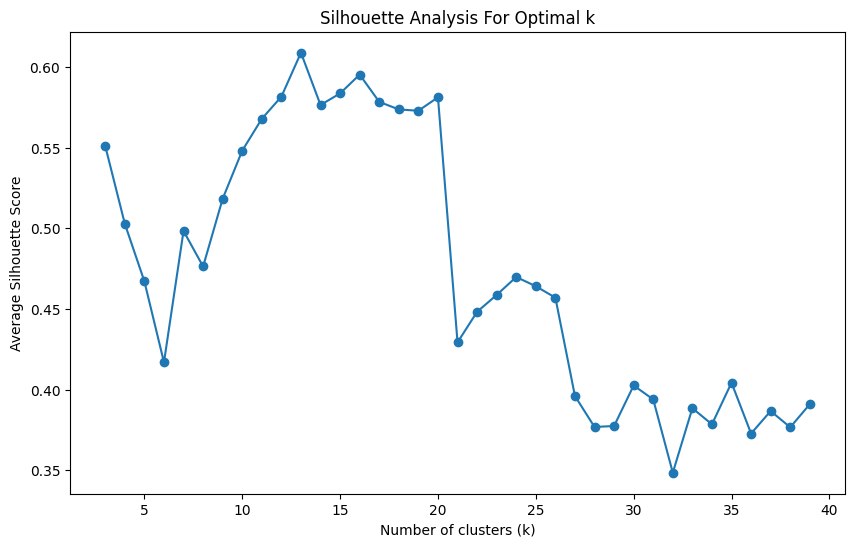

The optimal number of clusters based on silhouette analysis is: 13


In [32]:
# Assuming pivot_table_scaled is your data prepared for clustering
range_n_clusters = list(range(3, max_k))  # Considering a range from 2 to 10 for k
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = clusterer.fit_predict(pivot_table_scaled)
    silhouette_avg = silhouette_score(pivot_table_scaled, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title('Silhouette Analysis For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

# Choose the k with the highest average silhouette score
optimal_k = range_n_clusters[silhouette_avg_scores.index(max(silhouette_avg_scores))]
print(f"The optimal number of clusters based on silhouette analysis is: {optimal_k}")

- `business_area`의 개수는 12이고, 클러스터 개수는 13
- Others를 새로운 클러스터라고하면 사실상 똑같음.
- `business_subarea`는 86개 값 그대로 쓰기는 부담스러움
- `business_subarea`는 없애도 될지도?

In [33]:
# Step 4: Apply clustering
k_optimal = 13  # Example choice, replace with your chosen k based on the plot
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pivot_table_scaled)

# Add the cluster labels to the pivot table
pivot_table['Cluster'] = clusters

# Step 5: Analyze the Results
# You can now examine which business_subarea falls into which cluster
print(pivot_table['Cluster'])

business_subarea
Advertising                     12
Aerospace                        0
Agriculture                      0
Airline                          0
Airport / Airfield / Helipad     8
                                ..
Telecommunication                0
Townhouse                        0
Travel Agency                    0
Villa / Single-Family Home       3
Welfare Facilities               0
Name: Cluster, Length: 85, dtype: int32


In [34]:
# Group business_subareas by their cluster and list them
clusters = pivot_table['Cluster'].unique()  # Get unique cluster labels
clustered_subareas = {cluster: [] for cluster in clusters}  # Initialize a dictionary to hold lists of subareas for each cluster

for subarea, cluster in pivot_table['Cluster'].items():
    clustered_subareas[cluster].append(subarea)  # Append the subarea to the corresponding cluster list

# Print the elements of the same cluster
for cluster, subareas in clustered_subareas.items():
    print(f"Cluster {cluster}: {', '.join(subareas)}")

Cluster 12: Advertising, Construction, Engineering, IT/Software
Cluster 0: Aerospace, Agriculture, Airline, Banking, Bookstore, Botanical Garden / Green House, Broadcasting & Media, Bus Terminal, CVS (Convenience Store), Car Dealership, Casino Resort, Chemical Factory / Plant, Cinema /Theater, Clinic, Consulting, Cosmetics, Developer/Property, Distribution Center, Dormitory, Duty Free Shop, Energy, Entertainment, F&B(Food and Beverage), Finance, Fitness, Gas Station, General Hospital, Healthcare, Holdings, Hotel, Hyper Market & Grocery, Insurance, Investment, LTC(Long-Term Care), Law Firm, Logistics, Luxury(Watch/Jewelry Shop), Manufacturing, Military, Mining, Network/Cabling, Officetel, Pharmaceutical, Pharmaceutical Factory, Pharmacy, Police / Fire station, QSR(Quick Service Restaurant), Railway & Metro Station, Real-Estate Agency, Resort, Restaurant, Sea Passenger Terminal / Port, Shopping Mall, Sports Entertainment, Telecom Base Station / Data, Call, Telecommunication, Townhouse, T

In [35]:
# Assuming df_cleaned is your DataFrame after excluding 'Others' from 'business_subarea' and dropping NaN values
df_cleaned = df_areas.dropna(subset=['business_area', 'business_subarea'])

# Group by 'business_area' and aggregate unique 'business_subarea's
mapping = df_cleaned.groupby('business_area')['business_subarea'].unique()

# Convert the aggregated arrays to lists (for better readability) and sort them
mapping = mapping.apply(lambda x: sorted(list(x)))

# Print the mapping relationship
for area, subareas in mapping.items():
    print(f"[{area}]: {', '.join(subareas)}")


[corporate / office]: Advertising, Aerospace, Agriculture, Airline, Banking, Broadcasting & Media, Construction, Consulting, Developer/Property, Distribution Center, Energy, Engineering, Entertainment, Finance, Healthcare, Holdings, IT/Software, Insurance, Investment, Law Firm, Logistics, Manufacturing, Mining, Network/Cabling, Others, Pharmaceutical, Telecommunication
[education]: Higher Education (College & University), Institute & Academy, K12 Kindergarten & Schools, Others
[factory]: Chemical Factory / Plant, Manufacturing Factory / Plant, Others, Pharmaceutical Factory
[government department]: General Government Office, Military, Others, Police / Fire station, Welfare Facilities
[hospital & health care]: Clinic, Fitness, General Hospital, Hospital, LTC(Long-Term Care), Others
[hotel & accommodation]: Casino Resort, Cruise, Dormitory, Hotel, Others, Resort
[power plant / renewable energy]: Energy Storage & Saving, Others, Power Plant, Renewable Energy
[public facility]: Cinema /The

In [36]:
df_test = pd.read_csv(f'{config["data_path"]}/submission.csv')

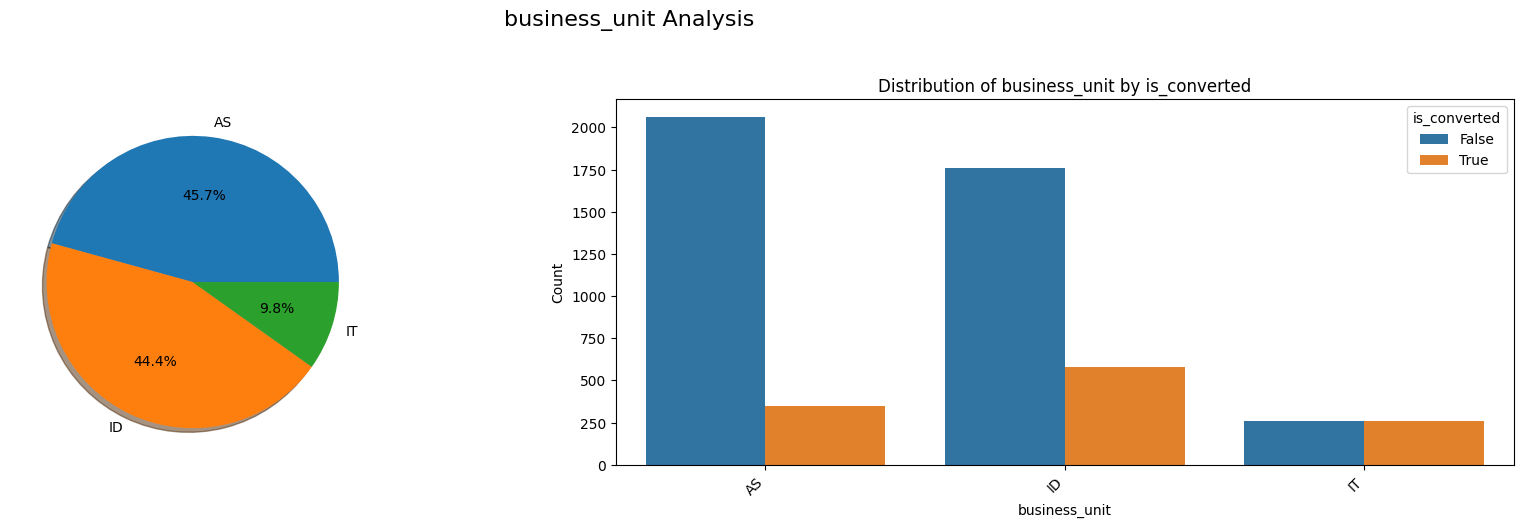

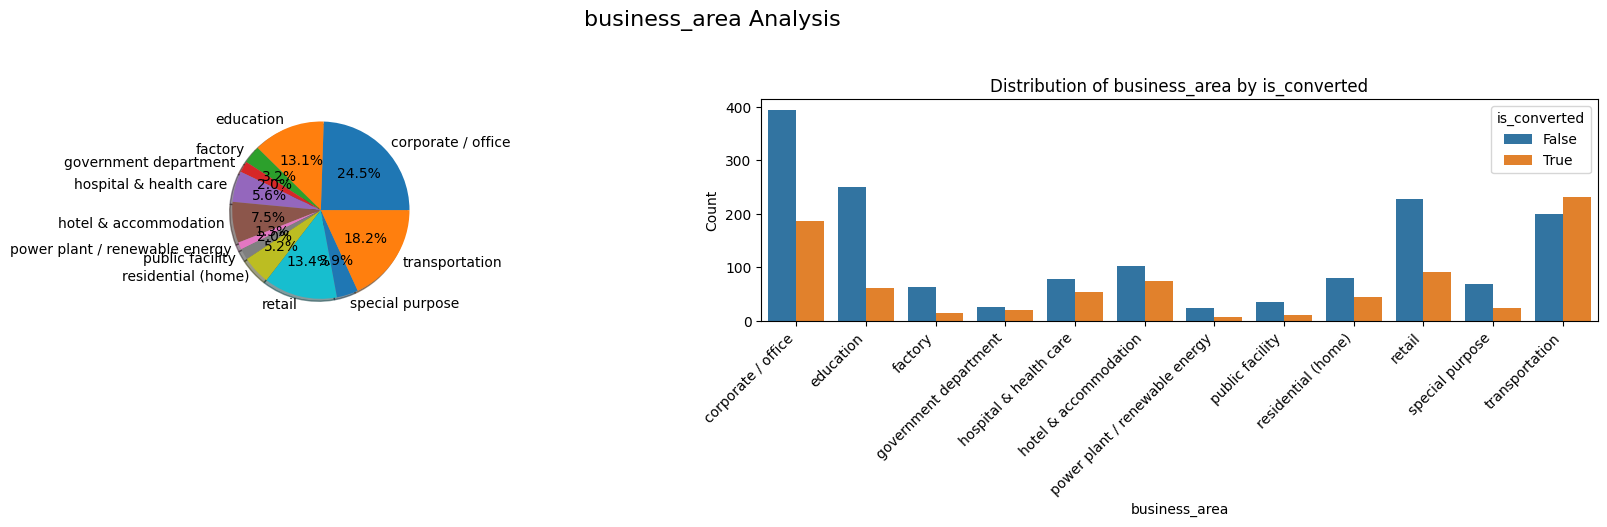

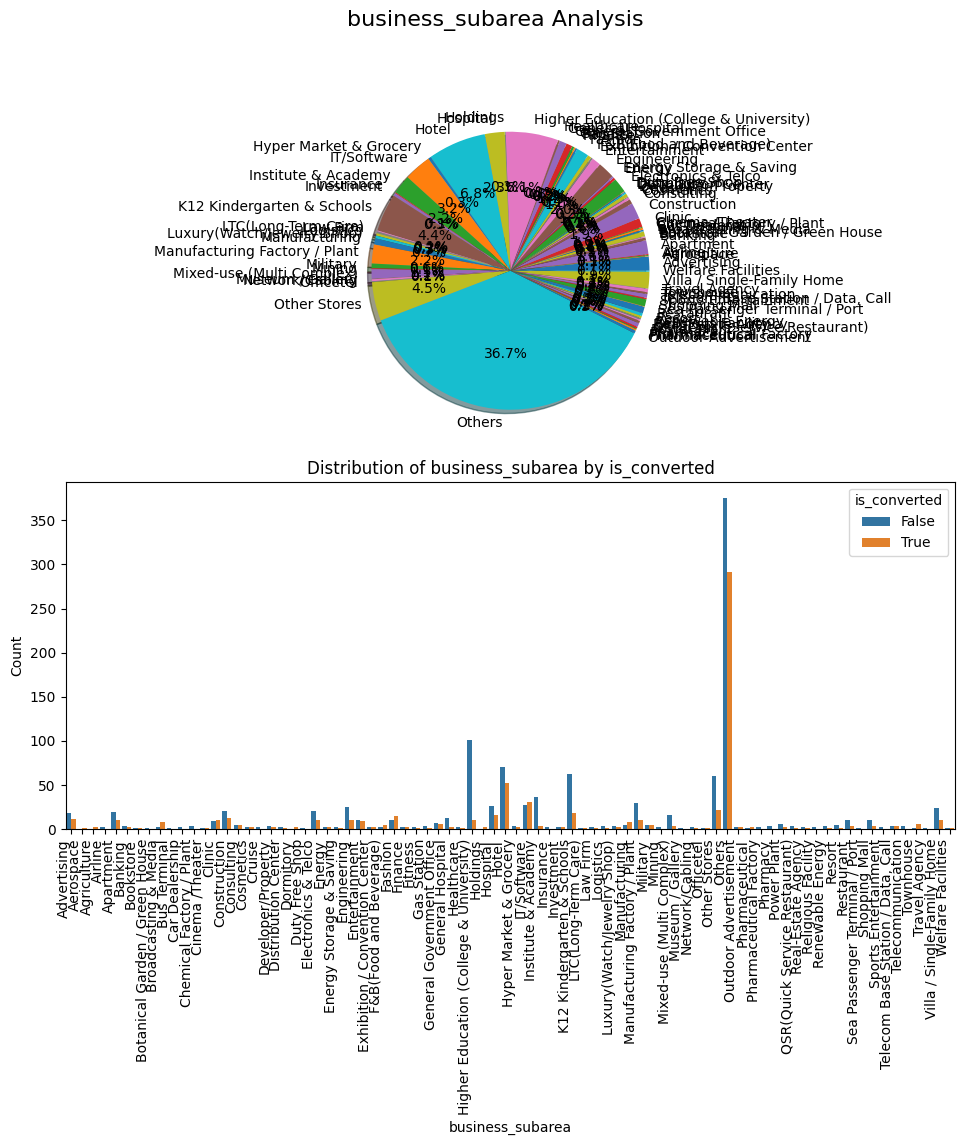

In [37]:
plot_cat_columns_v3(df_test, ['business_unit', 'business_area', 'business_subarea'], target='is_converted')

In [38]:
print(df_test['business_area'].nunique())
print(df_test['business_subarea'].nunique())

12
80


In [39]:
show_binary_ratio(df_test, ['business_unit', 'business_area', 'business_subarea'], target='is_converted')

business_unit: 5271
    AS True Ratio: 0.14, Total Count: 2410
    ID True Ratio: 0.25, Total Count: 2342
    IT True Ratio: 0.50, Total Count: 519

business_area: 2373
    corporate / office             True Ratio: 0.32, Total Count: 581
    education                      True Ratio: 0.20, Total Count: 312
    factory                        True Ratio: 0.18, Total Count: 77
    government department          True Ratio: 0.44, Total Count: 48
    hospital & health care         True Ratio: 0.41, Total Count: 133
    hotel & accommodation          True Ratio: 0.42, Total Count: 177
    power plant / renewable energy True Ratio: 0.23, Total Count: 31
    public facility                True Ratio: 0.25, Total Count: 48
    residential (home)             True Ratio: 0.35, Total Count: 124
    retail                         True Ratio: 0.29, Total Count: 318
    special purpose                True Ratio: 0.26, Total Count: 93
    transportation                 True Ratio: 0.54, Total Count: 